In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
mydata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
mydata.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
mydata.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
mydata.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
mydata.shape

(50000, 8)

In [8]:
mydata.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
###converting time of pickup to timestamp time from object type

mydata["date_time_of_pickup"] = pd.to_datetime(mydata["date_time_of_pickup"])

In [10]:
mydata.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [11]:
mydata.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [12]:
###checking for duplicate values
mydata.duplicated().sum()

0

In [13]:
### calculation of distance between latitude and longitude of pickup and dropoff


from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)  ### converting the values from decimal degrees to radians
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(mydata.shape[0]):
    d.append(distance(mydata["latitude_of_pickup"][i],
                      mydata["latitude_of_dropoff"][i],
                      mydata["longitude_of_pickup"][i],
                      mydata["longitude_of_dropoff"][i]))

In [14]:
mydata["distance in kms"] = d

In [15]:
mydata.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [16]:
### dropping the pickup and drop latitudes and longitudes
mydata.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"], axis = 1 , inplace =True)

In [17]:
mydata.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36


In [18]:
print("Date in data : ", mydata["date_time_of_pickup"].dt.day.sort_values().unique())

print("Month in data : ", mydata["date_time_of_pickup"].dt.month.unique()[0])

print("Year in data : ", mydata["date_time_of_pickup"].dt.year.unique()[0])

Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  6
Year in data :  2009


In [136]:
# Mapping days and Weekname
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}


In [24]:
mydata.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday


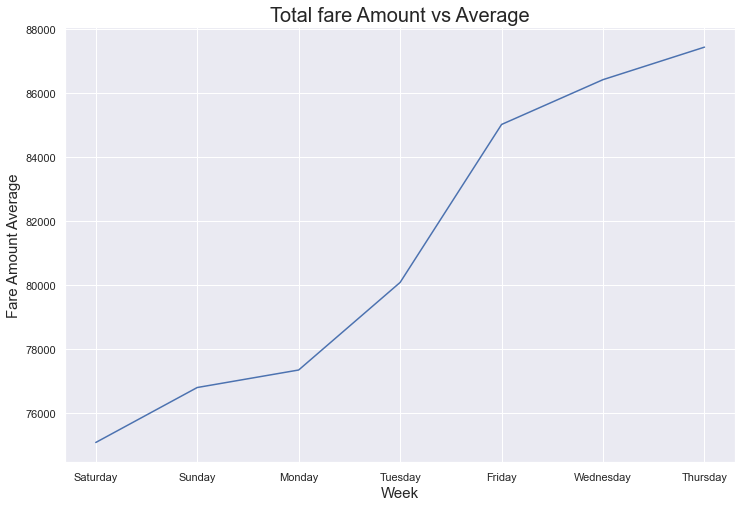

In [26]:
plt.figure(figsize = (12,8))
mydata.groupby("weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [27]:
mydata["Hour"] = mydata["date_time_of_pickup"].dt.hour

In [28]:
mydata["Hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

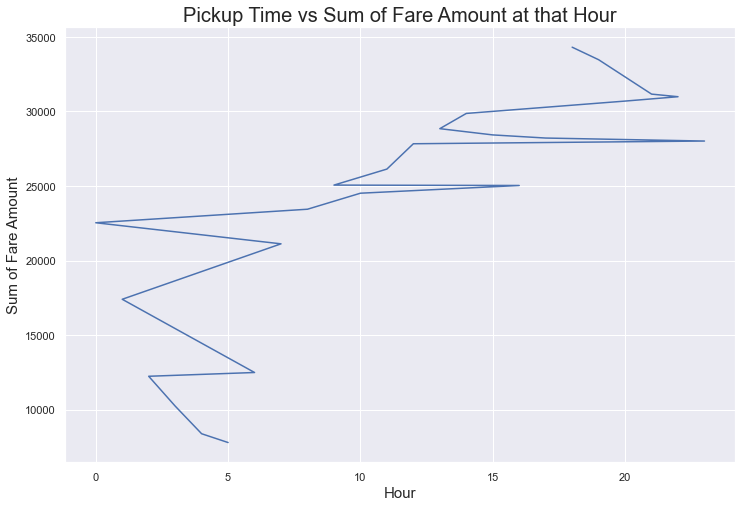

In [29]:
plt.figure(figsize = (12,8))
mydata.groupby("Hour")["amount"].sum().sort_values().plot()

plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.show()

In [30]:
mydata["Month_Day"] = mydata["date_time_of_pickup"].dt.day

In [31]:
# Sum of Taxi Fare in a particular day

for day in list(mydata["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total  Amount : {round(mydata[mydata.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")

Date : 1 	 Total  Amount : 17229.03
Date : 2 	 Total  Amount : 17711.51
Date : 3 	 Total  Amount : 17887.56
Date : 4 	 Total  Amount : 16871.76
Date : 5 	 Total  Amount : 18426.86
Date : 6 	 Total  Amount : 18898.4
Date : 7 	 Total  Amount : 19953.12
Date : 8 	 Total  Amount : 19773.47
Date : 9 	 Total  Amount : 19096.83
Date : 10 	 Total  Amount : 19103.29
Date : 11 	 Total  Amount : 18543.99
Date : 12 	 Total  Amount : 20143.27
Date : 13 	 Total  Amount : 19773.21
Date : 14 	 Total  Amount : 18941.62
Date : 15 	 Total  Amount : 19425.37
Date : 16 	 Total  Amount : 19864.5
Date : 17 	 Total  Amount : 19498.61
Date : 18 	 Total  Amount : 19117.84
Date : 19 	 Total  Amount : 19866.99
Date : 20 	 Total  Amount : 18862.46
Date : 21 	 Total  Amount : 20123.13
Date : 22 	 Total  Amount : 18670.33
Date : 23 	 Total  Amount : 18803.67
Date : 24 	 Total  Amount : 18053.6
Date : 25 	 Total  Amount : 18085.91
Date : 26 	 Total  Amount : 17250.97
Date : 27 	 Total  Amount : 17427.84
Date : 28 	 T

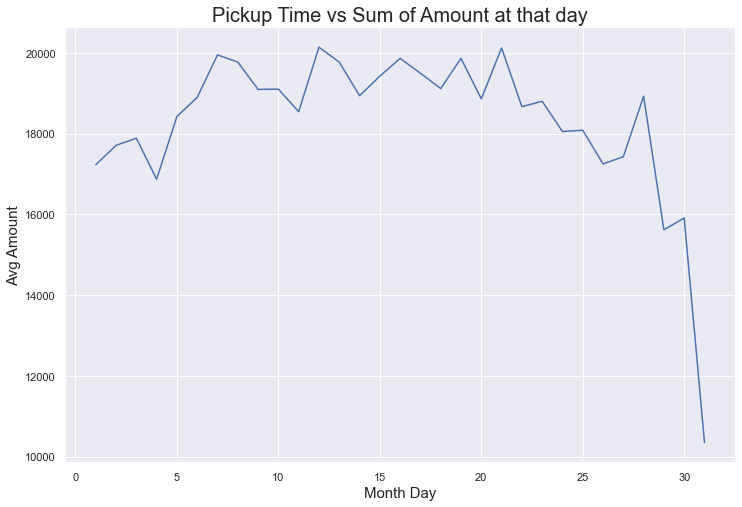

In [32]:
plt.figure(figsize = (12, 8))

mydata.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg Amount", fontsize=15)
plt.show()



In [33]:
mydata.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday,7,9


In [34]:
mydata["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

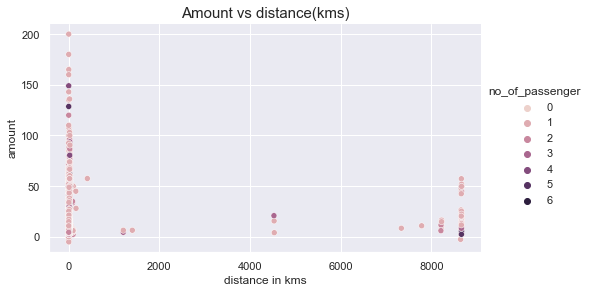

In [35]:
## Graph - Fare vs Distance

sns.relplot(data = mydata, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=4 ,aspect = 1.75,color="red")
plt.title("Amount vs distance(kms)" , fontsize=15)
plt.show()

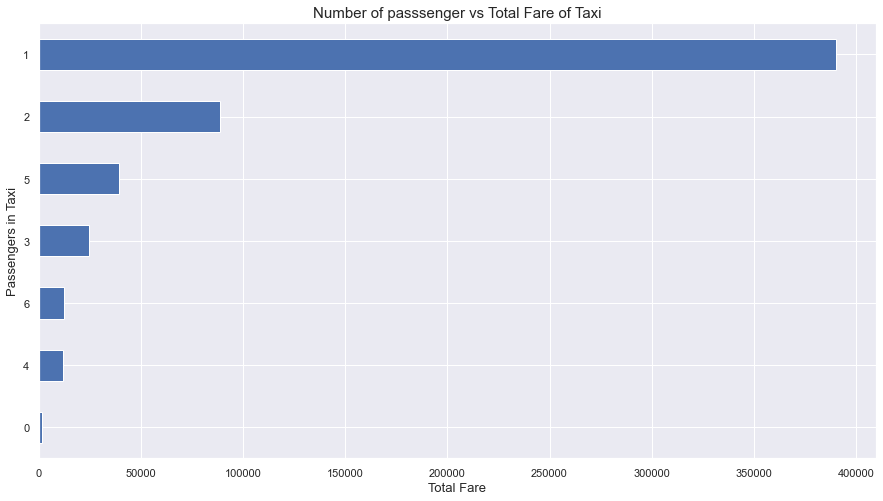

In [36]:
plt.figure(figsize=(15,8))
mydata.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [37]:
mydata.drop("date_time_of_pickup", axis=1, inplace=True)

In [38]:
mydata.head()

,unique_id,amount,no_of_passenger,distance in kms,weekday_name,Hour,Month_Day
0,26:21.0,4.5,1,0.41,Sunday,17,15
1,52:16.0,16.9,1,4.63,Monday,16,5
2,35:00.0,5.7,2,1.00,Wednesday,0,18
3,30:42.0,7.7,1,0.91,Friday,4,21
4,51:00.0,5.3,1,1.36,Monday,7,9


In [83]:
x=mydata.drop(['amount'],axis=1)
y=mydata[['amount']]

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression

x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [86]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [87]:
model_lr.score(x_train,y_train)

0.0013694547781091249

In [88]:
model_lr.score(x_test,y_test)

-1.0241440114633349e-05

In [97]:
#y_pred = LinearRegression.predict(x_test)
# Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # <-- you need to instantiate the regressor like so 
regressor.fit(x_train, y_train) # <-- you need to call the fit method of the regressor

# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

-1.0241440114633349e-05

In [100]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=15)

In [101]:
predict = rfreg.predict(x_test)

In [102]:
r2_score(y_test, predict)

0.5678298019417087

In [104]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=42)

In [105]:
pred = dt_reg.predict(x_test)
r2_score(y_test, pred)

0.21509128485178985

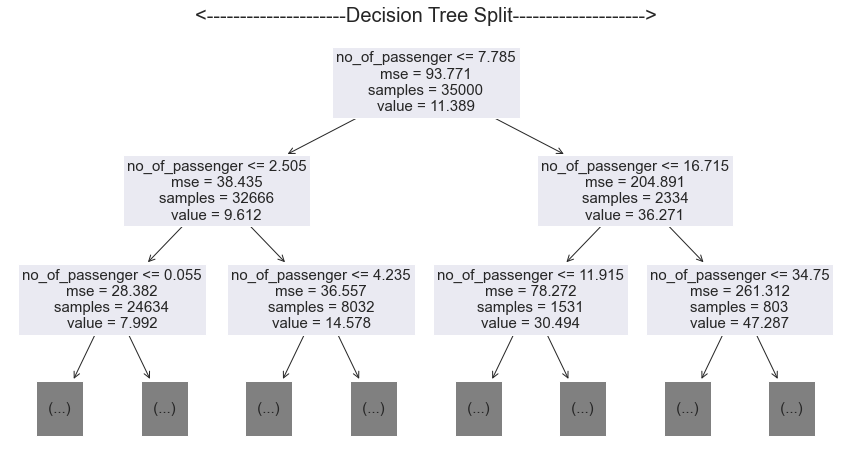

In [107]:
# Decision plot
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(dt_reg, max_depth = 2, fontsize = 15, feature_names=mydata.columns)
plt.title("<---------------------Decision Tree Split-------------------->", fontsize = 20)
plt.show()

In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
adBR = AdaBoostRegressor()

In [110]:
adBR.fit(x_train,y_train)

AdaBoostRegressor()

In [111]:
adBR.score(x_train,y_train)

0.264913613107956

In [112]:
adBR.score(x_test,y_test)

0.20188533754614624

In [117]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [120]:
from xgboost import XGBRegressor
GradientBoostRegressor = XGBRegressor(learning_rate= 0.30, max_depth=6, n_estimators=100, n_jobs =0)
GradientBoostRegressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
y_pred = y_pred = GradientBoostRegressor.predict(x_test)

In [123]:
r2_score(y_pred, y_test)

0.4686670143549383

In [124]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [125]:
n_estimators = [40,80,120,160]

criterion = ["mse","mae"]

max_depth = [int(x) for x in np.linspace(10,200,10)]

min_samples_split= [5,10,15]

min_samples_leaf = [4,6,8,10]

max_features = ['auto', 'sqrt', 'log2']

In [126]:
param_grid = {"n_estimators":n_estimators, "criterion":criterion, "max_depth":max_depth, "min_samples_split":
             min_samples_split, "min_samples_leaf":min_samples_leaf, "max_features":max_features}

In [128]:
RandomForestHyper = RandomForestRegressor()

In [130]:
RandomForestrandomcv = RandomizedSearchCV(estimator=RandomForestHyper, param_distributions=param_grid, n_iter=10, 
                                 cv = 2, verbose=1, random_state=100, n_jobs=-1)